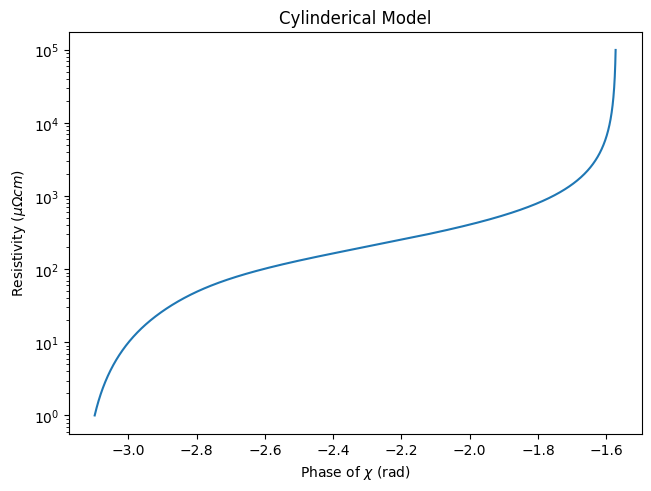

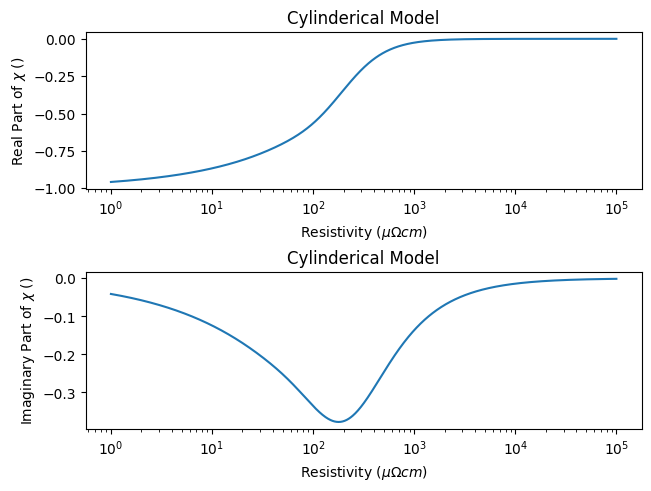

In [8]:
# Simulate the conversion between phase and resistivity

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import jv
from scipy import optimize
import random

def get_skin_depth(rho,frequency=671111):
    return (rho/(4e-7*np.pi * np.pi *frequency))**.5

rhos = np.logspace(-8,-3,1000)
# rhos = np.logspace(-11,-6,1000) #aluminum
# a = (get_area(sample_pic,otherstuff)/np.pi)**.5 
a = .096*25.4e-3/2 #this is the radius of the sample #Al sample
a = .115*25.4e-3/2 #this is the radius of the sample #BW60_1
# a = 1.275e-3 #BW79_1
# a = np.sqrt(1.5748e-3*1.524e-3/np.pi) # r = sqrt(Area/pi)
chis = np.zeros(len(rhos),dtype=np.complex128)
for i, rho in enumerate(rhos):
    rk =(1-1j)*a/get_skin_depth(rho)
    chis[i] = 2/rk*jv(1,rk)/jv(0,rk)-1

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.angle(chis),rhos*1e8)
ax.set_xlabel(r'Phase of $\chi$ (rad)')
ax.set_ylabel(r'Resistivity ($\mu \Omega cm$)')
ax.set_title('Cylinderical Model')
ax.set_yscale('log')

fig2 = plt.figure(constrained_layout = True)
bx = fig2.add_subplot(2, 1, 1)
cx = fig2.add_subplot(2, 1, 2)
bx.plot(rhos*1e8,np.real(chis))
bx.set_xlabel(r'Resistivity ($\mu \Omega cm$)')
bx.set_ylabel(r'Real Part of $\chi$ ()')
bx.set_title('Cylinderical Model')
bx.set_xscale('log')
cx.plot(rhos*1e8,np.imag(chis))
cx.set_xlabel(r'Resistivity ($\mu \Omega cm$)')
cx.set_ylabel(r'Imaginary Part of $\chi$ ()')
cx.set_title('Cylinderical Model')
cx.set_xscale('log')

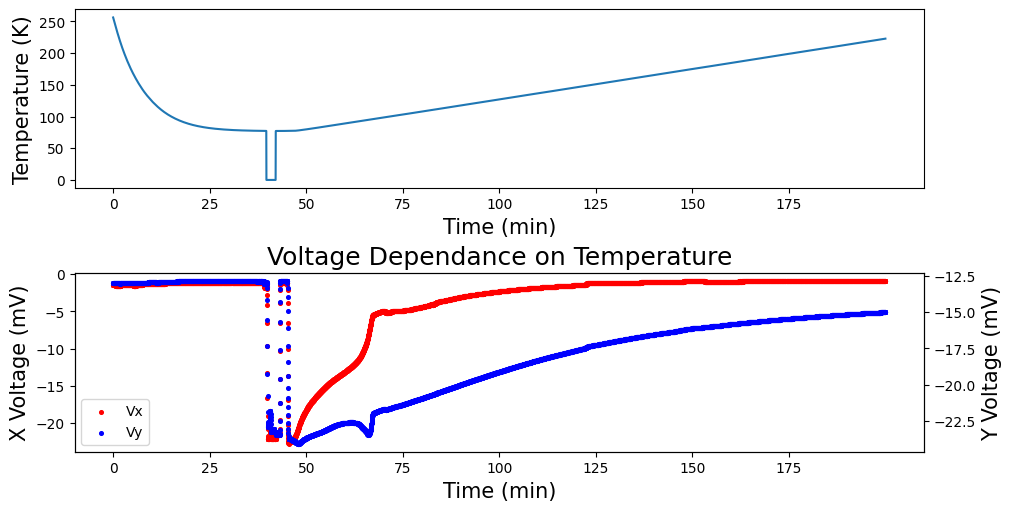

In [16]:
# view and zoom into data to get specific information

#adjust these parameters
# probe_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/2023_4_2_3.dat' # small sample
# probe_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/KTO_110_B5_1.dat'
probe_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/2023_4_2_2.dat'
# probe_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/AL_TEST.dat'
probe_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/BW60_1part3.dat'
# probe_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/BW79_1_1.dat'

# path_prefix = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/'
# path_suffix = '.dat'
# filename = '2022_3_48_1'

# probe_path = path_prefix + filename + path_suffix

xstep = 25 #10 steps in time is about right
timestart = 0
timeend = 200
all_data = np.genfromtxt(probe_path, delimiter='\t')
t = np.array(all_data[1:,0])
T = np.array(all_data[1:,1])
x = np.array(all_data[1:,2])*1000
y = np.array(all_data[1:,3])*1000


indexes1 = np.logical_and(t >= timestart, t <= timeend) #for display
t0 = t[indexes1]
T0 = T[indexes1]
x0 = x[indexes1]
y0 = y[indexes1]

fig0 = plt.figure(constrained_layout = True, figsize=(10, 5))
ax0 = fig0.add_subplot(2, 1, 1)
bx1 = fig0.add_subplot(2, 1, 2)
ax0.plot(t0,T0)
ax0.set_xlabel('Time (min)',fontsize = 15)
ax0.set_ylabel('Temperature (K)',fontsize = 15)
ax0.set_xticks(np.arange(timestart, timeend, step=xstep))
# ax = fig.add_subplot(2, 1, 1)
# bx1 = fig1.add_subplot(1, 1, 1)
# ax.plot(t[first:],T[first:])
# ax.set_xlabel('Time [min]',fontsize = 15)
# ax.set_ylabel('Temperature [K]',fontsize = 15)
bx1.set_title('Voltage Dependance on Temperature',fontsize = 18)
bx1.scatter(t0,x0,color='red',s=7)
bx1.set_xlabel('Time (min)',fontsize = 15)
bx1.set_ylabel('X Voltage (mV)',fontsize = 15)
bx1.set_xticks(np.arange(timestart, timeend, step=xstep))
bx2 = bx1.twinx()
bx2.scatter(t0[0],y0[0],color='red',s=7)
bx2.scatter(t0,y0,color='blue',s=7)
bx2.set_ylabel('Y Voltage (mV)',fontsize = 15)
_ = bx2.legend(['Vx','Vy'])

In [10]:
#eliminate jumps by hand
was_jump = False

if was_jump:
    jump_time_start = 90.3
    jump_time_end = 90.4


    x_amp = -.50 +.43 - 0.005#final - intial
    y_amp = -12.99 + 13.015 -.005
    x_amp = 0
    y_amp = 0

    indexes0 = np.logical_not(t < jump_time_end)
    x2 = x.copy()
    y2 = y.copy()
    x2[indexes0] = x[indexes0] - x_amp
    y2[indexes0] = y[indexes0] - y_amp

    indexes2 = np.logical_and(t >= jump_time_start, t <= jump_time_end)
    x2[indexes2] = (x[indexes2][-1] - x[indexes2][0] - x_amp)/(t[indexes2][-1] - t[indexes2][0])*(t[indexes2]-t[indexes2][0]) + x[indexes2][0] 
    y2[indexes2] = (y[indexes2][-1] - y[indexes2][0] - y_amp)/(t[indexes2][-1] - t[indexes2][0])*(t[indexes2]-t[indexes2][0]) + y[indexes2][0]
    print(x[indexes2][0],x[indexes2][-1])
    print(y[indexes2][0],y[indexes2][-1])

    indexes1 = np.logical_and(t >= jump_time_start-10, t <= jump_time_end+10)#this are purely for display
    t3 = t[indexes1]
    T3 = T[indexes1]
    x3 = x2[indexes1]
    y3 = y2[indexes1]


    fig = plt.figure(constrained_layout = True, figsize=(10, 5))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.set_title('Voltage Dependance on Temperature',fontsize = 18)
    ax1.scatter(t3,x3,color='red',s=7)
    ax1.set_xlabel('Time (min)',fontsize = 15)
    ax1.set_ylabel('X Voltage (mV)',fontsize = 15)
    ax1.set_xticks(np.arange(t3[0], t3[-1], step=2))
    ax2 = ax1.twinx()
    ax2.scatter(t3[0],y3[0],color='red',s=7)
    ax2.scatter(t3,y3,color='blue',s=7)
    ax2.set_ylabel('Y Voltage (mV)',fontsize = 15)
    ax2.legend(['Vx','Vy'])
else:
    x_amp = 0
    y_amp = 0
    jump_time_end = 0
    x2 = x.copy()
    y2 = y.copy()

-0.13251787222343858 -0.08646480888652164


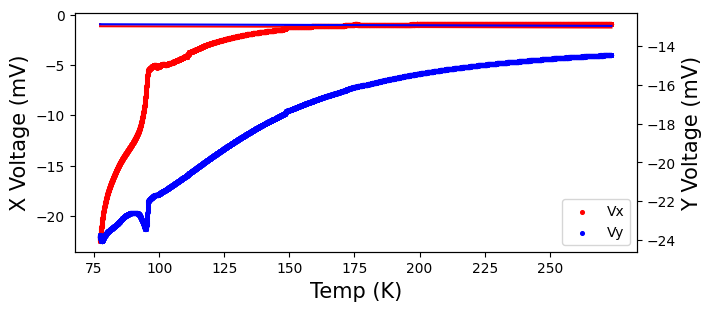

In [18]:
# show the final voltage measurements throughout the run

# Change these
intial_cal_start_time = 43.3#2.501#646#295.7#56#54.9#167#43.3#349.3#38 #
intial_cal_end_time = 45.1#5.5#660#297.1#58#56.4#169#45.1#351.2#39.8 #
final_cal_start_time = 254.1#2.5#660#483#290#223.4#304.7#254.1#583#294#
final_cal_end_time = 255.3#5.501#680#485#294#225.8#306.2#255.3#586#296# 

run_start_time = 46#7#425#298.5#60#60#182#48#356#47 #
run_stop_time = 253#186#630#463.1#286#210#290#253#582.7#270 #

lower_temp = 76

xstep1 = 25


totaltime = (final_cal_end_time + final_cal_start_time)/2 - (intial_cal_end_time + intial_cal_start_time)/2
starts = np.logical_and(t >= intial_cal_start_time, t <= intial_cal_end_time)
ends = np.logical_and(t >= final_cal_start_time, t <= final_cal_end_time)

xslope = (x[ends].mean() - x[starts].mean()-x_amp)/totaltime
yslope = (y[ends].mean() - y[starts].mean()-y_amp)/totaltime

print(xslope*totaltime,yslope*totaltime)

x_noise = xslope*(t - (intial_cal_end_time + intial_cal_start_time)/2) + x[starts].mean()
y_noise = yslope*(t - (intial_cal_end_time + intial_cal_start_time)/2) + y[starts].mean()


indexes0 = np.logical_not(t < jump_time_end)
x_noise[indexes0] = x_noise[indexes0] - x_amp
y_noise[indexes0] = y_noise[indexes0] - y_amp

indexes1 = np.logical_and(t >= run_start_time, t <= run_stop_time,T >= lower_temp)
t1 = t[indexes1]
T1 = T[indexes1]
x1 = x2[indexes1]
y1 = y2[indexes1]
x_noise = x_noise[indexes1]
y_noise = y_noise[indexes1]

indexes1 = np.logical_not(T1 < lower_temp)
t1 = t1[indexes1]
T1 = T1[indexes1]
x1 = x1[indexes1]
y1 = y1[indexes1]
x_noise = x_noise[indexes1]
y_noise = y_noise[indexes1]
# x_noise = np.ones(len(x_noise))*x[ends].mean()
# y_noise = np.ones(len(y_noise))*y[ends].mean()


fig1 = plt.figure(constrained_layout = True, figsize=(7, 3))
bx1 = fig1.add_subplot(1, 1, 1)
# bx1.set_title('Voltage Dependance on Temperature',fontsize = 18)
bx1.scatter(T1,x1,color='red',s=7)
bx1.plot(T1,x_noise,color='red')
bx1.set_xlabel('Temp (K)',fontsize = 15)
bx1.set_ylabel('X Voltage (mV)',fontsize = 15)
bx1.set_xticks(np.arange(75, T1.max(), step=xstep1))
bx2 = bx1.twinx()
bx2.scatter(T1[0],y1[0],color='red',s=7)
bx2.scatter(T1,y1,color='blue',s=7)
bx2.plot(T1[0:2],y_noise[0:2],color='red')
bx2.plot(T1,y_noise,color='blue')
bx2.set_ylabel('Y Voltage (mV)',fontsize = 15)
_ = bx2.legend(['Vx','Vy'])
            #    ,'Vx Noise','Vy Noise'])
# # bx2.set_ylim([-13,-12.8])
# bx1.set_ylim([-.6,-.45])
_ = 1

Try to Fit Phase

In [19]:
Phase2Resistivty = interp1d(np.angle(chis),rhos)

#this is a guess
res_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/KTO-ch1-B5_ch2-B7_ch3_B9.dat'
res_data = np.genfromtxt(res_path, delimiter=',',skip_header=32)
# print(res_data)
rT = np.transpose(res_data)[3]
rR = np.transpose(res_data)[19] #b5 is 19, b9 is 21 #np.pi*0.5334e-3/np.log(2)*
rR = np.pi*0.5334e-3/np.log(2)*rR
# resvT = np.interp(T1,rT,rR)
al_temp = np.array([70,80,90,100,120,140,160,180,200,220,240,260,280,300])
al_res = np.array([0.1618, 0.2439, 0.3377, 0.4401, 0.6601, 0.8899, 1.123, 1.356, 1.589, 1.820, 2.049, 2.278, 2.506,2.733])

data_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/MikeVeitResistivityasgrown.csv'
data = np.loadtxt(data_path,delimiter=",", dtype=np.float64)
temp = data[:,0] # kelvin
res = data[:,1]*1e-5 #mohm cm = 1000 micro ohm cm

temp = np.flip(data[:,0]) # kelvin
res = np.flip(data[:,1]*1e-5) #mohm cm = 1000 micro ohm cm

resvT = np.interp(T1,temp,res)
# resvT = np.interp(T1,np.flip(temp),np.flip(res))

print(res)

def modelVx(xy, vx,vy):
    x, y = xy
    return np.interp(np.angle(x-vx +(y-vy)*1j),np.angle(chis),rhos)
guess_amp = 0
x_guess = guess_amp*(random.random())+np.max(x1)
y_guess = guess_amp*(random.random())+np.max(y1)
# print(x_guess,y_guess)
# print(np.average(x1),np.average(y1))
# print(np.max(x1-x_guess),np.max(y1-y_guess))
guesses1 = [x_guess,y_guess]
pbounds1 = np.array([[np.max(x1),np.max(y1)],[np.max(x1)+30,np.max(y1)+30]]) # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(modelVx,(x1,y1),resvT,guesses1, bounds=pbounds1)
bestpars1 = bestfit[0]
print(bestpars1)
print(np.angle(bestpars1[0]+bestpars1[1]*1j))


[2.31481481e-08 1.85185185e-07 3.00925926e-07 3.47222222e-07
 3.93518519e-07 4.16666667e-07 4.39814815e-07 4.39814815e-07
 5.32407407e-07 5.55555556e-07 5.78703704e-07 6.25000000e-07
 6.25000000e-07 6.71296296e-07 7.17592593e-07 7.87037037e-07
 8.56481481e-07 9.25925926e-07 9.95370370e-07 1.04166667e-06
 1.11111111e-06 1.15740741e-06 1.20370370e-06 1.22685185e-06
 1.31944444e-06 1.36574074e-06 1.41203704e-06 1.45833333e-06
 1.52777778e-06 1.59722222e-06 1.64351852e-06 1.68981481e-06
 1.73611111e-06 1.75925926e-06 1.80555556e-06 1.85185185e-06
 1.89814815e-06 1.89814815e-06 1.96759259e-06 2.03703704e-06
 2.08333333e-06 2.12962963e-06 2.12962963e-06 2.19907407e-06
 2.24537037e-06 2.29166667e-06 2.33796296e-06 2.43055556e-06
 2.45370370e-06 2.43055556e-06 2.50000000e-06 2.52314815e-06
 2.56944444e-06 2.61574074e-06 2.68518519e-06 2.66203704e-06
 2.75462963e-06 2.80092593e-06 2.84722222e-06 2.89351852e-06
 2.89351852e-06 2.91666667e-06 2.98611111e-06 3.05555556e-06
 3.07870370e-06 3.125000

-0.47052853992849286
[[-0.46952854]
 [-0.21319322]]
-0.46852853992849286


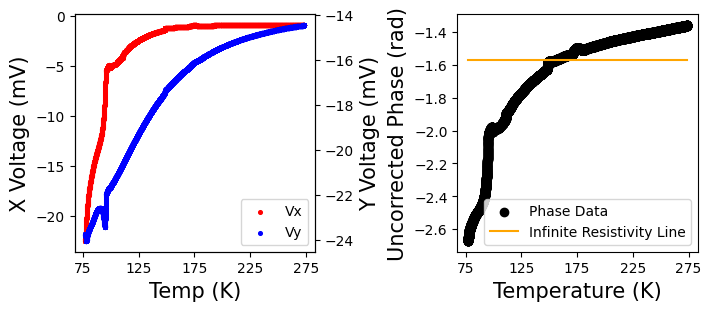

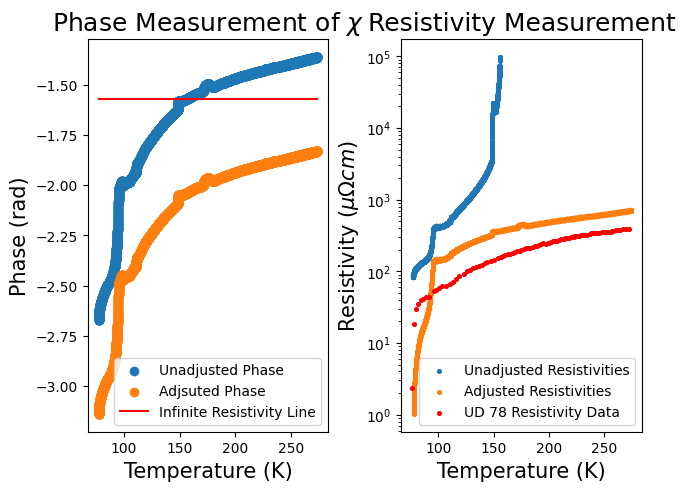

In [27]:
phase = np.angle(1*(x1-x_noise) +(y1-y_noise)*1j)
# phase = np.angle(x1-bestpars1[0] +(y1-bestpars1[1])*1j)
fig2 = plt.figure(constrained_layout = True,figsize=(7,3))
bx1 = fig2.add_subplot(1,2, 1)
bx1.scatter(T1,x1,color='red',s=7)
# bx1.plot(T1,x_noise,color='red')
bx1.set_xlabel('Temp (K)',fontsize = 15)
bx1.set_ylabel('X Voltage (mV)',fontsize = 15)
# bx1.set_xticks(np.arange(75, T1.max(), step=xstep1))
bx1.set_xticks(np.arange(75, 325, step=50))
bx2 = bx1.twinx()
bx2.scatter(T1[0],y1[0],color='red',s=7)
bx2.scatter(T1,y1,color='blue',s=7)
# bx2.plot(T1[0:2],y_noise[0:2],color='red')
# bx2.plot(T1,y_noise,color='blue')
bx2.set_ylabel('Y Voltage (mV)',fontsize = 15)
_ = bx2.legend(['Vx','Vy'],loc='lower right')
ax1 = fig2.add_subplot(1,2, 2)
# ax1.scatter(T1,60*np.gradient(T1))
ax1.scatter(T1,phase,color = 'black')
ax1.set_xlabel('Temperature (K)',fontsize = 15)
ax1.set_ylabel('Uncorrected Phase (rad)',fontsize = 15)
# ax1.set_title(r'Phase Measurement of $\chi$',fontsize = 18)
ax1.plot([T1.min(),T1.max()],[-np.pi/2,-np.pi/2] ,color = 'orange')#infinite resistiivty
# ax1.plot([T1.min(),T1.max()],[np.pi/2,np.pi/2] ,color = 'orange')
ax1.legend(['Phase Data','Infinite Resistivity Line'])
ax1.set_xticks(np.arange(75, 325, step=50))
# phase -= abs(phase.min() + np.pi) #this is background phase
print(-abs(phase.min() + np.pi))
def getphase(x, phase1):
    try:
        return Phase2Resistivty(x+phase1)
    except:
        return 0
guesses1 = [-abs(phase.min() + np.pi)+.002]
pbounds1 = np.array([[-phase.min()-np.pi+.001],[-np.pi/2-phase.max()-.001]]) # [[Lower bounds],[upper bounds]]
print(pbounds1)
bestfit = optimize.curve_fit(getphase,phase,resvT,guesses1, bounds=pbounds1)
bestpars1 = bestfit[0]
print(bestpars1[0])

# ax2 = ax1.twinx()
# ax2.scatter(T,phase)
# ax2.set_ylabel('Corrected Phase [rad]',fontsize = 15)
# ax2.plot([T1.min(),T1.max()],[-np.pi/2,-np.pi/2] ,color = 'red')
# ax2.set_ylim(-3.2,-1.4)
# ax1.set_ylim(-2.6,-1.4-abs(phase.min() + np.pi))

i = np.logical_and(phase+bestpars1[0]>np.angle(chis)[0], phase+bestpars1[0]<np.angle(chis)[-1]) #negative chis
j = np.logical_and(phase>np.angle(chis)[0], phase<np.angle(chis)[-1]) #negative chis
# i = np.logical_and(phase<np.angle(chis)[0], phase>np.angle(chis)[-1])#positive chis
i2 = np.logical_not(temp>T1.max())
Phase2Resistivty = interp1d(np.angle(chis),rhos) 

# fig0 = plt.figure(constrained_layout = True)
# bx1 = fig0.add_subplot(1, 1, 1)
# fig01 = plt.figure(constrained_layout = True)
# bx2 = fig01.add_subplot(1,1,1)
# bx1.set_title('Voltage Dependance on Temperature',fontsize = 18)
# bx1.scatter(T1,1*(x1-x_noise),color='red',s=7)
# bx1.set_xlabel('Temp (K)',fontsize = 15)
# bx1.set_ylabel('X Voltage (mV)',fontsize = 15)
# bx1.set_xticks(np.arange(75, T1[-1], step=xstep1))
# # bx2 = bx1.twinx()
# # bx2.legend(['Vx','Vy'])
# # bx2.scatter(T1[0],1*(y1[0]-y_noise[0]),color='red',s=7)
# bx2.scatter(T1,1*(y1-y_noise),color='blue',s=7)
# bx2.set_ylabel('Y Voltage (mV)',fontsize = 15)

bump = 0

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 2, 1)
bx = fig.add_subplot(1, 2, 2)
ax.scatter(T1,phase)
ax.scatter(T1,phase+bestpars1[0])
ax.plot([T1.min(),T1.max()],[-np.pi/2,-np.pi/2],color = 'red') #infinite resistiivty
# ax.plot([T1.min(),T1.max()],[np.pi/2,np.pi/2] ,color = 'orange')
ax.set_xlabel('Temperature (K)',fontsize = 15)
ax.set_ylabel('Phase (rad)',fontsize = 15)
ax.set_title(r'Phase Measurement of $\chi$',fontsize = 18)
ax.legend(['Unadjusted Phase','Adjsuted Phase','Infinite Resistivity Line'])

bx.scatter(T1[j],1e8*Phase2Resistivty(phase[j]),s=7)
bx.scatter(T1[i],1e8*Phase2Resistivty(phase[i]+bestpars1[0]),s=7)
# bx.scatter(rT,rR*1e8)
bx.scatter(temp[i2],1e8*res[i2],color='red',s=7)
bx.set_xlabel('Temperature (K)',fontsize = 15)
bx.set_ylabel(r'Resistivity ($\mu \Omega cm$)',fontsize = 15)
bx.set_title(r'Resistivity Measurement',fontsize = 18)
bx.set_yscale('log')
_ = bx.legend(['Unadjusted Resistivities','Adjusted Resistivities','UD 78 Resistivity Data'])

[ 0.01134841 -0.67875947]


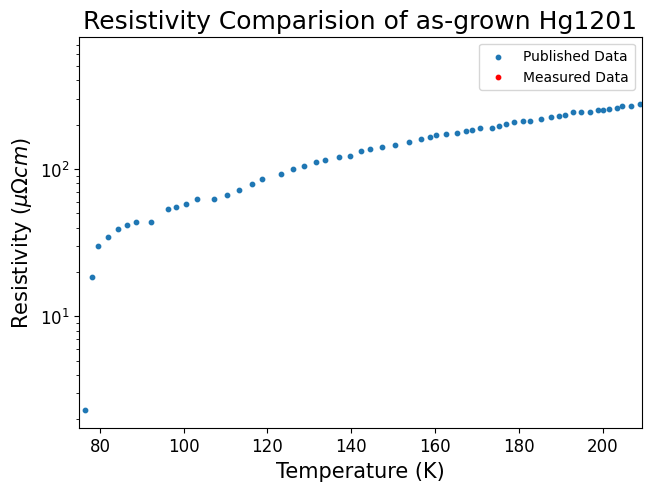

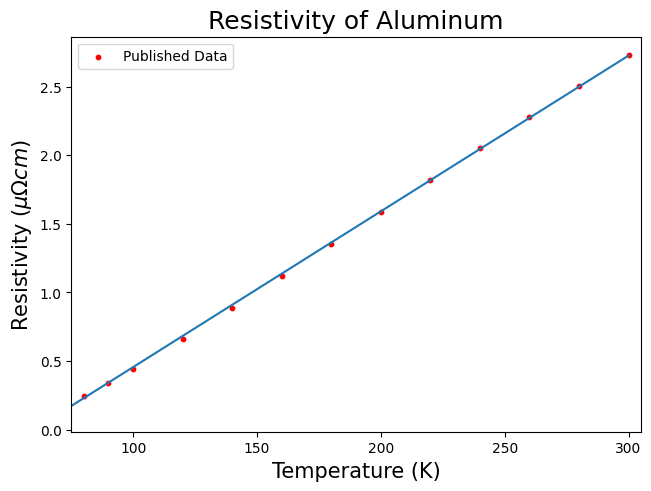

In [14]:
data_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/MikeVeitResistivityasgrown.csv'
data = np.loadtxt(data_path,delimiter=",", dtype=np.float64)
temp = data[:,0] # kelvin
res = data[:,1] #mohm cm = 1000 micro ohm cm

al_temp = np.array([70,80,90,100,120,140,160,180,200,220,240,260,280,300])
al_res = np.array([0.1618, 0.2439, 0.3377, 0.4401, 0.6601, 0.8899, 1.123, 1.356, 1.589, 1.820, 2.049, 2.278, 2.506,2.733])

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.scatter(temp,res*1000,s=10)

ax.scatter(T1[i],1e8*Phase2Resistivty(phase[i]+bestpars1[0]),color='red',s=10)
ax.set_xlabel('Temperature (K)',fontsize = 15)
ax.set_ylabel(r'Resistivity ($\mu \Omega cm$)',fontsize = 15)
ax.set_title(r'Resistivity Comparision of as-grown Hg1201',fontsize = 18)
ax.set_yscale('log')
ax.set_xlim(75,T1.max())
ax.legend(['Published Data','Measured Data'])

fig2 = plt.figure(constrained_layout = True)
bx = fig2.add_subplot(1, 1, 1)

bx.scatter(al_temp,al_res,color='red',s=10)
bx.set_xlabel('Temperature (K)',fontsize = 15)
bx.set_ylabel(r'Resistivity ($\mu \Omega cm$)',fontsize = 15)
bx.set_title(r'Resistivity of Aluminum',fontsize = 18)
# bx.set_yscale('log')
bx.set_xlim(75,305)
bx.legend(['Published Data','Measured Data'])

def linmodel(x, m,b):
    return m*x+b
guesses2 = [4/300,0]
pbounds2 = np.array([[1e-6,-1],[.1,.5]]) # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(linmodel,al_temp,al_res,guesses2, bounds=pbounds2)
bestpars2 = bestfit[0]
print(bestpars2)
bx.plot(al_temp,bestpars2[0]*al_temp+bestpars2[1])
plt.show()

In [15]:
phase = np.angle(1*(x1-x_noise) +(y1-y_noise)*1j)
fitting_range = np.logical_not(T1<150)

# phase = np.angle(x1-bestpars1[0] +(y1-bestpars1[1])*1j)

# fig2 = plt.figure(constrained_layout = True)
# ax1 = fig2.add_subplot(1, 1, 1)
# # ax1.scatter(T1,60*np.gradient(T1))
# ax1.scatter(T1,phase)
# ax1.set_xlabel('Temperature (K)',fontsize = 15)
# ax1.set_ylabel('Uncorrected Phase (rad)',fontsize = 15)
# ax1.set_title(r'Phase Measurement of $\chi$',fontsize = 18)
# ax1.plot([T1.min(),T1.max()],[-np.pi/2,-np.pi/2] ,color = 'orange')#infinite resistiivty
# # ax1.plot([T1.min(),T1.max()],[np.pi/2,np.pi/2] ,color = 'orange')
# ax1.legend(['Phase Data','Infinite Resistivity Line'])

# phase -= abs(phase.min() + np.pi) #this is background phase

def getphase(x, phase1):
    try:
        return Phase2Resistivty(x+phase1)
    except:
        return 0
guesses1 = [-abs(phase.min() + np.pi)+.002]
guesses1 = [-.8]

pbounds1 = np.array([[-phase[fitting_range].min()-np.pi+.001],[np.pi/2-phase[fitting_range].max()-.001]]) # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(getphase,phase[fitting_range],resvT[fitting_range],guesses1, bounds=pbounds1)
bestpars1 = bestfit[0]
print(pbounds1)
print(bestpars1[0])
# bestpars1[0] = -.8

i = np.logical_and(phase+bestpars1[0]>np.angle(chis)[0], phase+bestpars1[0]<np.angle(chis)[-1]) #negative chis
j = np.logical_and(phase>np.angle(chis)[0], phase<np.angle(chis)[-1]) #negative chis
# i = np.logical_and(phase<np.angle(chis)[0], phase>np.angle(chis)[-1])#positive chis
i2 = np.logical_not(temp>T1.max())
Phase2Resistivty = interp1d(np.angle(chis),rhos) 


fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 2, 1)
bx = fig.add_subplot(1, 2, 2)
ax.scatter(T1,phase)
ax.scatter(T1,phase+bestpars1[0])
ax.plot([T1.min(),T1.max()],[-np.pi/2,-np.pi/2],color = 'red') #infinite resistiivty
# ax.plot([T1.min(),T1.max()],[np.pi/2,np.pi/2] ,color = 'orange')
ax.set_xlabel('Temperature (K)',fontsize = 15)
ax.set_ylabel('Phase (rad)',fontsize = 15)
ax.set_title(r'Phase Measurement of $\chi$',fontsize = 18)
ax.legend(['Unadjusted Phase','Adjsuted Phase','Infinite Resistivity Line'])

bx.scatter(T1[j],1e8*Phase2Resistivty(phase[j]),s=7)
bx.scatter(T1[i],1e8*Phase2Resistivty(phase[i]+bestpars1[0]),s=7)
# bx.scatter(rT,rR*1e8)
# bx.scatter(temp[i2],res[i2],color='red',s=7)
# bx.scatter(T1[fitting_range],resvT[fitting_range],color='magenta',s=7)
# bx.scatter(T1,1e8*resvT,color='magenta',s=7)
bx.set_xlabel('Temperature (K)',fontsize = 15)
bx.set_ylabel(r'Resistivity ($\mu \Omega cm$)',fontsize = 15)
bx.set_title(r'Resistivity Measurement',fontsize = 18)
bx.set_yscale('log')
_ = bx.legend(['Unadjusted Resistivities','Adjusted Resistivities','UD 78 Resistivity Data'])

[[-3.37277151]
 [ 1.33761747]]
-0.8
Error in callback <function _draw_all_if_interactive at 0x000001CFF5ED8DC0> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 640x480 with 2 Axes>